### 군집(Clustering)

`군집` 은 데이터셋을 클러스터 그룹으로 나누는 작업이다. 한 클러스터 안의 데이터포인트 끼리 매우 비슷하고 다른 데이터 포인트와는 구분이 되도록 데이터를 나누는 것이 목표이다. 분류알고리즘과 비슷하게 군집알고리즘은 각 데이터 포인터가 어느 클러스터에 속하는지 할당 또는 예측하는 것이다.


#### clustering

1. 분류의 2가지종류

 - Classfication
 - Clustering

2. 군집분석의 원리

 - 거리가 가까운 (유사도가 높은) 객체들을 서로 묶어 하나의 그룹으로 정리
 - 거리의 계산방법
 * 유클리드 거리(Euclidean distance)가 주로 사용
 * 맨하턴거리 - 벡터요인간의 최단거리
 - 군집화의 방법
 * 계층적군집화 방법 :  hierachical method
 * 비계측적 군집화 방법 : K-means
 
### K-means 

`K-means` 군집은 가장 보편적으로 사용되는 군집알고리즘이다. 이 알고리즘은 데이터의 임의의 영역을 대표하는 `클러스터 중심`를 찾는다. 이 알고리즘은 두 단계를 반복하는데 먼저 데이터 포인트를 가장 가까운 클러스터 중심에 할당하고 그 다음 클러스터에 할당된 데이터 포인트의 평균으로 클러스터의 중심을 다시 가정한다. 클러스터에 할당되는 데이터 포인트에 변화가 없을 때 알고리즘이 종료된다.

1. k-means 군집화의 실행단계

 - 나누고자 하는 클러스터의 갯수를 설정, 그 갯수만큼의 `임의의 초기점 생성`
 - initial point를 군집의 중심점으로 생각하고 군집구분을 실시
 - 군집별로 새로운 군집 중심점을 계산
 - 새로운 군집중심점을 기준으로 군집구분을 실시
 - 더이상 군집 구분의 변화가 없을 때까지 군집중심점을 반복 계산
 
2. k-means clustering의 장단점
 - 장점 : 적용이 쉽고 간단하다.
 - 단점 : 군집의 갯수 K값은 사전에 설정해야 한다.(정답이 정해진 경우 수가 다르면 결과 왜곡)
          군집설정에 이상치의 영향을 크게 받는다.
          
3. KNN알고리즘(KMEANS과의 차이)
- k-최근접이웃알고리즘(KNN, K-Nearest Neighboor)은 분류알고리즘
- k-means는 군집알고리즘
- 분류 방법: 새로운 값이 들어올 시 가까운 군집의 중심이 아닌 가장 가까운 객체를 통해 분류

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothicCoding'
plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams['figure.dpi'] = 200
#plt.rcParams['image.cmap'] = 'gray'
#plt.rcParams['axes.xmargin'] = '0.05'
#plt.rcParams['axes.ymargin'] = '0.05'

import mglearn
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

#### 실습 1. Kmeans의 blobs데이터셋

In [ ]:
mglearn.plots.plot_kmeans_algorithm() # k-means를 설명하는 그래프

In [ ]:
mglearn.plots.plot_kmeans_boundaries() # 군집의 결과를 보여주는 예제 그래프

#### 실습 2. 인위적인 2차원데이터셋


(100, 2) (100,)
[[-7.72642091 -8.39495682]
 [ 5.45339605  0.74230537]
 [-2.97867201  9.55684617]
 [ 6.04267315  0.57131862]
 [-6.52183983 -6.31932507]]
[2 1 0 1 2]


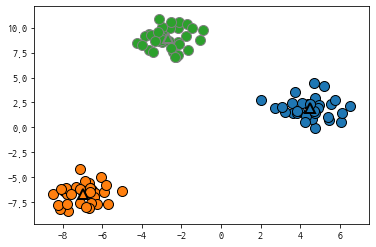

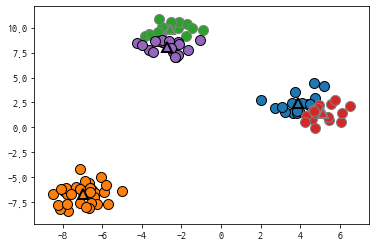

In [2]:
# bobls 내장된 2차원 데이터셋 
X, y = datasets.make_blobs(random_state=42)
print(X.shape, y.shape)
print(X[:5])
print(y[:5])

# 시각화
kmeans = KMeans(n_clusters=3).fit(X)
label3 = np.unique(kmeans.labels_)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                        label3, markers='^', markeredgewidth=2)

plt.show()

# KMeans() : 군집화 모델을 생성(기계학습)
# 클러스터의 갯수(k) = 3으로 설정
# 비지도학습이기 때문에 X값 즉, 데이터만 전달(input)
kmeans = KMeans(n_clusters=3) # 클러스터수를 3, 5 또는 7...등으로 변경해서 실습해 볼 것
kmeans.fit(X)

kmeans = KMeans(n_clusters=5).fit(X)
label5 = np.unique(kmeans.labels_)
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
                        label5, markers='^', markeredgewidth=2)

plt.show()


#### K-means 알고리즘이 실패하는 경우

데이터셋의 클러스터 갯수를 정확하게 알고 있더라도 

In [ ]:
x_varied, y_varied = datasets.make_blobs(n_samples=200, cluster_std=[1,2.5,0.5], random_state=42)
y_pred = KMeans(n_clusters=3, random_state=0).fit(x_varied)

plt.legend(['1','2','3'], loc='best')
mglearn.discrete_scatter(x_varied[:,0], x_varied[:,1], y_pred.labels_, markers='o')
plt.xlabel('특성0')
plt.ylabel('특성1')
plt.title('클러스터의 밀도가 다를 떄 k-means의 군집화')

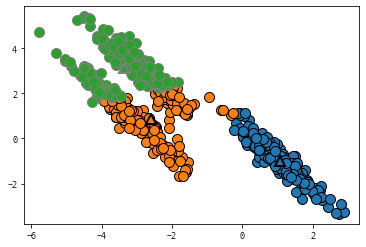

In [35]:
# 데이터셋의 분포가 원형이 아닐경우 k-means알고리즘은 잘 분류하지 못한다.

# 1. 무작위 클러스터 데이터를 생성
X, y = datasets.make_blobs(n_samples=600, random_state=170)
rng = np.random.RandomState(74)

# 2. 테이터가 길게 늘어지도록 인위적으로 변경
#    실습데이터를 행렬곱으로 생성
transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

# 3. k값이 3인 K-means알고리즘을 적용 : 기계학습
kmeans = KMeans(n_clusters=3).fit(X)
y_pred = kmeans.predict(X)

# 4. 인위적인 데이터셋을 시각화
mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], 
                         kmeans.cluster_centers_[:,1],
                         [0,1,2],
                         markers='^',
                         markeredgewidth=2)


plt.show()

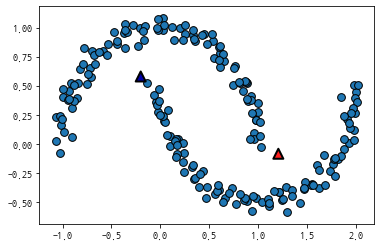

In [45]:
# B. 복잡한 클러스터를 k-means알고리즘은 잘 분류하지 못한다.

# 1. 인위적으로 복잡한 클러스터를 가진 데이터를 생성
# make_moons함수를 이용하여 2개의 달의 형태를 가진 데이터생성(노이즈 0.05)
x, y = datasets.make_moons(n_samples=200, noise = 0.05, random_state=0)

# 2. k=2인 K-means알고리즘 적용 : 기계학습
kmeans = KMeans(n_clusters=2).fit(x)
y_pred = kmeans.predict



plt.scatter(x[:,0], x[:,1], s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
            marker='^',
            c=[mglearn.cm2(0), mglearn.cm2(1)],
            s=100,
            linewidths=2,
            edgecolors='k')
plt.show()

# 결과분석
# two_moons데이터처럼 복잡한 형태라면 성능이 더 나빠진다. 군집알고리즘이 두개의 반달모양을 분류하면
# 좋겠지만 k-means알고리즘을 사용해서는 분류하기가 어렵다.

##### 고유얼굴 특성 추출

`PCA`는 특성추출에도 이용한다. 특성추출은 원본 데이터표현보다 분석하기에 더 적합한 표현을 
찾을 수 있다라는 생각에서 출발한다. 이미지를 다루는 애플리케이션은 특성추출에 도움이 되는 예제이다. 이미지는 RGB강도가 기록된 픽셀로 구성된다.

PCA를 이용하여 `LFW labeled Faces in the Wild` 데이터셋의 얼굴이미지에 특성을 추출하고 MNF와 K-MEANS의 결과를 비교해보자.


In [5]:
# PCA : 주성분(특성)추출, NMF : 흑백이미지
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.datasets import fetch_lfw_people

(2361, 87, 65)


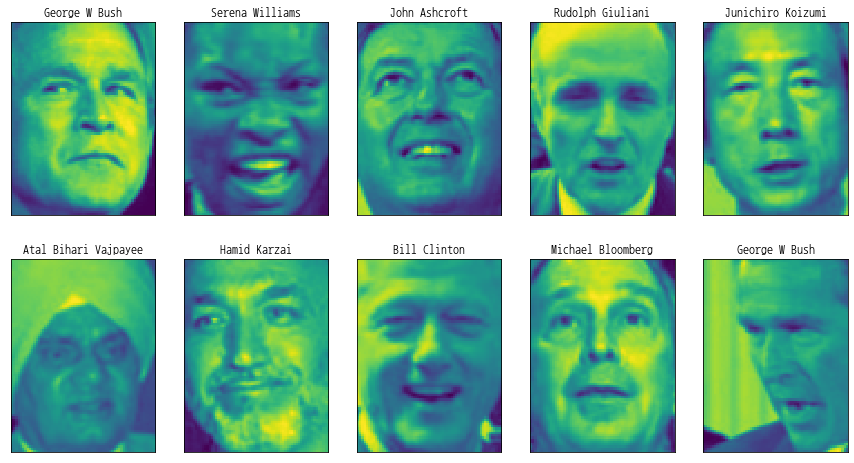

In [6]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
print(people.images.shape)

# 샘플이미지시각화
fig, axes = plt.subplots(2, 5, figsize=(15,8), subplot_kw={'xticks':(), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
    

In [7]:
# 각 이미지가 나타난 횟수를 계산

people.target[0:10], people.target_names[people.target[0:10]]

# 1차원데이터를 오름차순으로 정렬한 뒤 빈도수를 반환
counts = np.bincount(people.target)

# 타겟별 이름과 횟수 출력
for i, (counts, name) in enumerate(zip(counts,people.target_names)):
    print('{0:25}{1:3}'.format(name,counts), end = '    ')
    

Alejandro Toledo          39    Alvaro Uribe              35    Amelie Mauresmo           21    Andre Agassi              36    Ariel Sharon              77    Atal Bihari Vajpayee      24    Bill Clinton              29    Colin Powell             236    Donald Rumsfeld          121    George Robertson          22    George W Bush            530    Gerhard Schroeder        109    Gloria Macapagal Arroyo   44    Hamid Karzai              22    Hans Blix                 39    Igor Ivanov               20    Jack Straw                28    Jacques Chirac            52    Jean Chretien             55    Jennifer Aniston          21    Jennifer Capriati         42    John Ashcroft             53    Juan Carlos Ferrero       28    Junichiro Koizumi         60    Kofi Annan                32    Laura Bush                41    Lindsay Davenport         22    Lleyton Hewitt            41    Megawati Sukarnoputri     33    Michael Bloomberg         20    Pete Sampras              22    Rudolph 

In [8]:
mask = np.zeros(people.target.shape , dtype =np.bool)

for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1
print(mask)

x_people = people.data[mask]
y_people = people.target[mask]
x_people = x_people / 255 # 이미지 흑백변환

[ True  True  True ... False  True False]


In [9]:
X_train, X_test, y_train, y_test = \
    train_test_split(x_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0).fit(X_train, y_train)
pca = PCA(n_components=100, random_state=0).fit(X_train, y_train)
kmeans = KMeans(n_clusters=100, random_state=0).fit(X_train, y_train)

# 초평면으로 날린 뒤 다시 원본으로 복구시킨거 같은데
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_nnf = np.dot(nmf.transform(X_test), nmf.components_)
X_reconstructed_km = kmeans.cluster_centers_[kmeans.predict(X_test)]

(356,)

Text(0, 0.5, 'nmf')

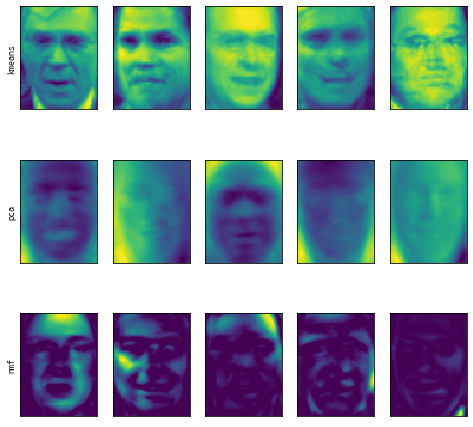

In [62]:
image_shape = people.images[0].shape

fig, axes = plt.subplots(3,5, figsize =(8,8), subplot_kw={'xticks':(), 'yticks':()})

# 여기서 pca의 components_는 초평면을 의미한다.
# 이는 원본 데이터를 분류하기 위해 차원을 축소시킨 초평면을 의미한다. 그래서 100개의 행이 있음
# 아래 그림을 볼 때 초평면을 통해 고차원의 데이터를 구별할 수 있을지 모르지만
# 이 경우에는 알맞지 않다고 볼 수 있다. 이 중 k-means가 가장 우수한 성과를 보인다.

for ax , comp_kmeans, comp_pca, com_nmf in zip(axes.T, kmeans.cluster_centers_,
                                              pca.components_, nmf.components_):
    ax[0].imshow(comp_kmeans.reshape(image_shape))
    ax[1].imshow(comp_pca.reshape(image_shape))
    ax[2].imshow(com_nmf.reshape(image_shape))
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('pca')
axes[2,0].set_ylabel('nmf')


#### 실습 K-Means(iris데이터)

Text(0, 0.5, 'nmf')

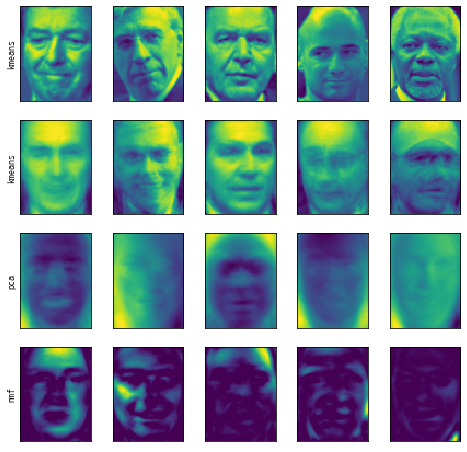

In [13]:
fig , axes = plt.subplots(4,5, subplot_kw = {'xticks':(), 'yticks':()}, figsize=(8,8))

for ax, orig, rec_kmeans , rec_pca,rec_nmf in zip(axes.T, X_test,X_reconstructed_km,
                                              pca.components_, nmf.components_):
    ax[0].imshow(orig.reshape(image_shape))
    ax[1].imshow(rec_kmeans.reshape(image_shape))
    ax[2].imshow(rec_pca.reshape(image_shape))
    ax[3].imshow(rec_nmf.reshape(image_shape))
    
# k-means
axes[0,0].set_ylabel('kmeans')
axes[1,0].set_ylabel('kmeans')
axes[2,0].set_ylabel('pca')
axes[3,0].set_ylabel('nmf')



#### 벡터양자화 또는 분해메서드로서의 k-means

k-means이 군집알고리즘이지만 `k-means`와 `PCA, NMF`와 같은 알고리즘은 분해알고리즘에 있어서 유사점이 있다. `PCA`는 데이터에서 분산이 가장 큰 방향을 찾으려고 하고 NMF는 데이터의 극단 또는 일부분에 중첩가능한 성분(음수가 아닌 성분)을 찾는다. PCA와 NMF 두가지 방법은 모두 데이터포인트를 어떤 성분의 합으로 표현한다. 반면에 k-means는 클러스터를 중심으로 각 데이터를 표현한다. 이를 각 데이터포인트가 클러스터중심 즉, 하나의 성분으로 표현된다고 볼 수 있다. k-means를 이렇게 각 포인트가 하나의 성분으로 분해되는 관점으로 보는 것을 `벡터의 양자화 Vector quantization`이라고 한다.

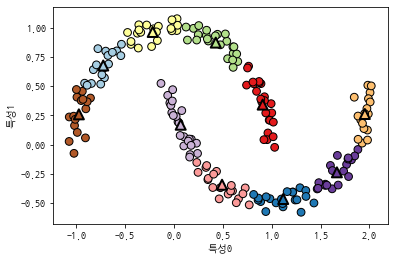

클러스터 레이블 : [4 7 6 9 7 7 4 1 4 1 8 3 7 1 0 4 2 3 2 0 5 1 2 1 8 6 7 5 6 2 4 8 1 6 4 5 3
 4 0 6 3 8 2 6 7 8 4 0 6 1 0 3 5 9 1 4 2 1 2 8 3 9 7 4 1 9 8 7 8 9 3 9 3 6
 1 9 6 4 2 3 5 8 3 5 6 8 4 8 3 5 2 4 5 0 5 7 7 3 9 6 1 5 8 4 9 6 9 8 7 2 0
 8 8 9 4 1 2 5 3 4 4 0 6 8 6 0 4 6 1 5 4 0 9 3 1 7 1 9 5 4 6 6 2 8 8 4 6 1
 2 6 3 7 4 2 3 8 1 3 2 2 6 1 2 7 3 7 2 3 7 1 2 9 0 0 6 1 5 0 0 2 7 0 5 7 5
 2 8 3 9 0 9 2 4 4 6 0 5 6 2 7]


In [50]:
# moons데이터셋
# k-means를 사용한 백터양자화는 입력데이터의 차원보다 더 많은 클러스터를 사용해 데이터를
# 인코딩할 수 있다. 10개의 클러스터를 사용해서 각 데이터포인터는 0~9사이의 값(숫자)를 가진다.

x,y = datasets.make_moons(n_samples=200, noise = 0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0).fit(x)
y_pred = kmeans.predict(x)

plt.scatter(x[:,0],x[:,1],s=60, c=y_pred, edgecolors='k',cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:,0], 
            kmeans.cluster_centers_[:,1],
            marker='^',
            c=range(kmeans.n_clusters),
            s=100,
            cmap='Paired',
            linewidths=2,
            edgecolors='k')
plt.xlabel('특성0')
plt.ylabel('특성1')

plt.show()

print('클러스터 레이블 : {}'.format(y_pred))

# 결과분석
# 문은 2차원데이터이기 떄문에 PCA, NMF로 할 수 잇는 것이 많지는 않다. PCA, NMF를 사용해
# 차원축소를 하면 1차원 데이터셋으로 변환되어 그 결과 데이터구조가 완전히 파괴될 수 있다.
# 하지만 벡터양자화된 K-means를 사용한다면 데이터를 더 잘 표현할 수 있다.

In [54]:
distance_features = kmeans.transform(x)

distance_features



200

###### k-means의 장단점

`k-means`은 비교적 이해하기 쉽고 구현도 쉬울 뿐만 아니라 비교적 빠르기 때문에 가장 인기 있는 군집알고리즘이다. `k-means`는 데용량 데이터셋에서도 잘 동작하지난 `scikit-learn`은 아주 큰 데이터셋을 처리할 수 있는 `MinBatchKMeans`도 제공한다. MinBatchKMeans는 알고리즘이 반복될 때 전체 데이터에서 일부를 무작위로 선택(MinBatch)해서 클러스터의 중심을 계산한다. 미니배치의 크기는 `batch_size`매개변수로 지정하면 기본값은 100이다.

k-means의 단점은 무작위 초기화를 사용하여 알고리즘의 출력이 난수 초기값에 따라 달라 진다는 점이다. 이러점을 보완하기위해서 scikit-learn은 기본적으로 서로 다른 난수의 초기값으로 10번반복하여 최선의 초기값을 결정한다.

k-means의 더 큰 단점은 클러스터의 모양을 원형 또는 밀집된 형태로 가정하고 있어서 활용범위가 비교적 제한적이면 또 찾으려는 클러스터의 갯수를 사전에 지정해야 한다는 것이다.

이런 단점을 개선한 두가지 군집알로리즘은 `병합군집`과 `DBSCAN`이라는 알고리즘이다.
->
데이터에 사용자가 지정한 클러스터의 만큼 변수를 추가한다. 이 변수는 각 데이터가 클러스터의 중심점과의 거리를 저장한다. 이런 식으로 데이터와 중심점과의 거리를 비교하게된다.
이것은 데이터의 차원이 낮을 경우(2차원) 구현, 분별이 잘된다.
데이터의 차원이 높은 경우 비교가 어려워진다.

#### 실습 k-means(iris 데이터셋)


In [ ]:
import sklearn.metrics as sm

iris = datasets.load_iris()

# 데이터 프레임 변환
x = pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

x.columns = iris.feature_names
y.columns = ['target']

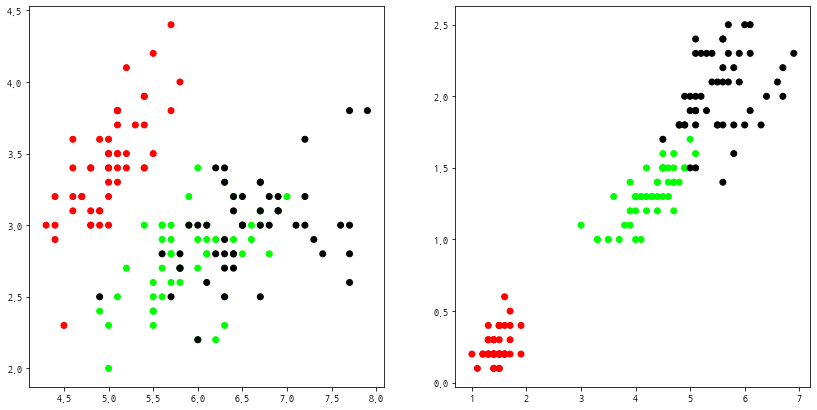

In [75]:
# 데이터의 시각화
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1) # 1행 2열중 첫번째 그래프
plt.scatter(x.iloc[:,0],x.iloc[:,1], c= colormap[y.target])

plt.subplot(1,2,2) # 1행 2열중 첫번째 그래프
plt.scatter(x.iloc[:,2],x.iloc[:,3], c= colormap[y.target])

In [80]:
# 기계학습
kmeans = KMeans(n_clusters=3).fit(x)
print(kmeans)
print(kmeans.labels_)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


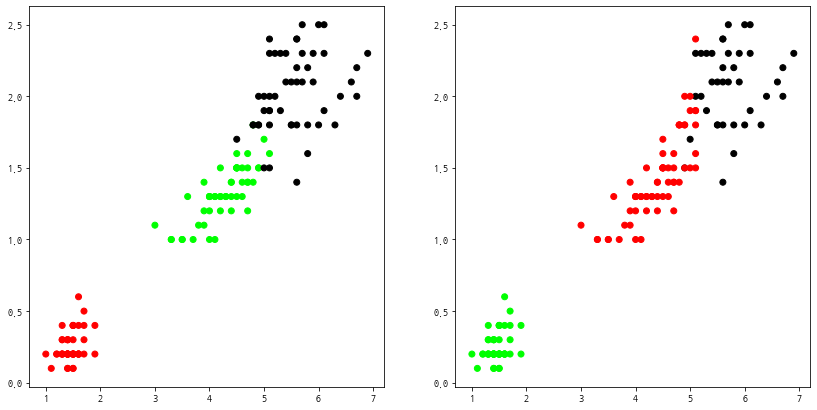

In [91]:
# 정답과 예측결과 비교 및 시각화
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,2],x.iloc[:,3], c= colormap[y.target]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,2],x.iloc[:,3], c= colormap[kmeans.labels_])

# 결과분석
# clustering은 비교적 잘 되었지만 색상이 다름('분류가 잘못된것')
# kmeans알고리즘은 비지도학습이기 때문에 정답을 사전에 알 수 없어서 군집은 잘 나누지만
# 라벨번호는 구분하지 않는다.
# 그래서 색상이 바뀌어도 의미는 크게 없다.

In [112]:
# label순서변경
# [0,1,2]에서 [2,0,1]로 변경할 경우 생상도 일치
predY = np.choose(kmeans.labels_, [1,0,2]).astype(np.int64)
print(kmeans.labels_)
print(predY)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 2 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


0.8933333333333333


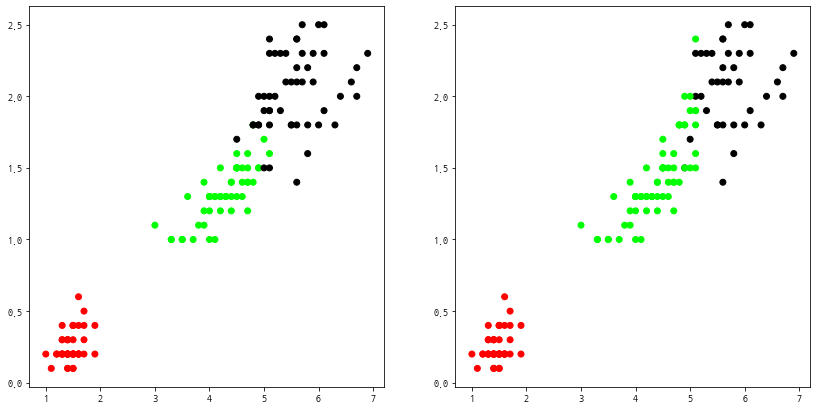

In [114]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,2],x.iloc[:,3], c= colormap[y.target]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,2],x.iloc[:,3], c= colormap[predY])

print(sm.accuracy_score(y,predY))

#### 실습. 유방암 데이터

In [182]:
cancer = datasets.load_breast_cancer()


In [183]:
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.DataFrame(cancer.target, columns=['target'])

In [ ]:
cancer.feature_names

In [286]:
X.iloc[:,[7, 9, 14, 27]]

,mean concave points,mean fractal dimension,smoothness error,worst concave points
0,0.14710,0.07871,0.006399,0.2654
1,0.07017,0.05667,0.005225,0.1860
2,0.12790,0.05999,0.006150,0.2430
3,0.10520,0.09744,0.009110,0.2575
4,0.10430,0.05883,0.011490,0.1625
...,...,...,...,...
564,0.13890,0.05623,0.010300,0.2216
565,0.09791,0.05533,0.005769,0.1628
566,0.05302,0.05648,0.005903,0.1418
567,0.15200,0.07016,0.006522,0.2650


In [280]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X, y) 
mlr.coef_
# 7.146440155040024 -15.854320748152018, -1.05679513e+01, -4.30348309e+00
#  fractal dimension error 20, smoothness error 15, concave points error 18,worst fractal dimension30
# 가장 영향이 큰거 4개
x = X.iloc[:,[7, 9, 14, 27]]

In [281]:
kmeans = KMeans(n_clusters=2).fit(x)

predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)

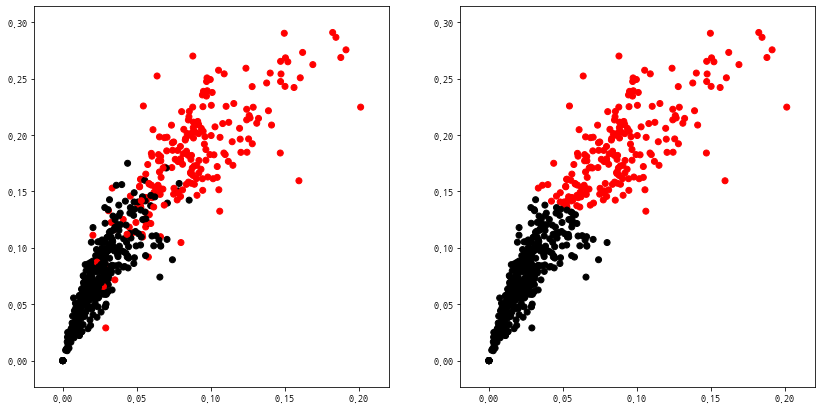

In [288]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','black'])
plt.subplot(1,2,1) # 정답
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[y.target]) # 꽃잎기준 정답

plt.subplot(1,2,2) # 예측
plt.scatter(x.iloc[:,0],x.iloc[:,3], c= colormap[predY])

In [ ]:
print(sm.accuracy_score(y,predY))

In [283]:
# 1개씩 증가하는 조합
for i in range(0,27):
    x = X.iloc[:,[i,i+1,i+2,i+3]]
    kmeans = KMeans(n_clusters=2).fit(x)
    predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
    print(sm.accuracy_score(y,predY))
    
# 가장 높은 정답률이 무엇일가 실험 1) for문을 통해서 서로 연결되어있는 변수 4개를 추출 순서대로 돌러봄
# 가장 높은 정답률은 89%  19,20,21,22 조합 
# 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter'
# 초기에 영향력이 높게 측정된 20이 들어가 있음
# 'worst symmetry 'worst concave points',  'worst compactness', 'worst area' 0.894

0.9209138840070299


In [246]:
# 모든 조합으로 실험
ac = []
for i in range(0,30):
    ac.append(i)

# 콤비네이션은 지정된 숫자의 모든 조합을 보여줌
from itertools import combinations
ab = list(combinations(ac,4))
ad = []
for i in range(len(ab)):
    ad.append(list(ab[i]))
ad

[[0, 1, 2, 3],
 [0, 1, 2, 4],
 [0, 1, 2, 5],
 [0, 1, 2, 6],
 [0, 1, 2, 7],
 [0, 1, 2, 8],
 [0, 1, 2, 9],
 [0, 1, 2, 10],
 [0, 1, 2, 11],
 [0, 1, 2, 12],
 [0, 1, 2, 13],
 [0, 1, 2, 14],
 [0, 1, 2, 15],
 [0, 1, 2, 16],
 [0, 1, 2, 17],
 [0, 1, 2, 18],
 [0, 1, 2, 19],
 [0, 1, 2, 20],
 [0, 1, 2, 21],
 [0, 1, 2, 22],
 [0, 1, 2, 23],
 [0, 1, 2, 24],
 [0, 1, 2, 25],
 [0, 1, 2, 26],
 [0, 1, 2, 27],
 [0, 1, 2, 28],
 [0, 1, 2, 29],
 [0, 1, 3, 4],
 [0, 1, 3, 5],
 [0, 1, 3, 6],
 [0, 1, 3, 7],
 [0, 1, 3, 8],
 [0, 1, 3, 9],
 [0, 1, 3, 10],
 [0, 1, 3, 11],
 [0, 1, 3, 12],
 [0, 1, 3, 13],
 [0, 1, 3, 14],
 [0, 1, 3, 15],
 [0, 1, 3, 16],
 [0, 1, 3, 17],
 [0, 1, 3, 18],
 [0, 1, 3, 19],
 [0, 1, 3, 20],
 [0, 1, 3, 21],
 [0, 1, 3, 22],
 [0, 1, 3, 23],
 [0, 1, 3, 24],
 [0, 1, 3, 25],
 [0, 1, 3, 26],
 [0, 1, 3, 27],
 [0, 1, 3, 28],
 [0, 1, 3, 29],
 [0, 1, 4, 5],
 [0, 1, 4, 6],
 [0, 1, 4, 7],
 [0, 1, 4, 8],
 [0, 1, 4, 9],
 [0, 1, 4, 10],
 [0, 1, 4, 11],
 [0, 1, 4, 12],
 [0, 1, 4, 13],
 [0, 1, 4, 14],
 [0, 1, 4,

In [250]:
# 만든 조합의 모든 정확도를 계산해서 리스트로 저장
ac_list = []
for i in ad:
    x = X.iloc[:,i]
    kmeans = KMeans(n_clusters=2).fit(x)
    predY = np.choose(kmeans.labels_, [1,0]).astype(np.int64)
    ac_list.append([i,sm.accuracy_score(y,predY)])
    


In [279]:
# 리스트 중 가장 높은 값을 가지는 조합을 찾음
dsd = 0
a = 0
for i in range(len(ac_list)):
    if dsd < ac_list[:][i][1]:
        dsd =ac_list[:][i][1]
        a = ac_list[:][i]
a
# [[7, 9, 14, 27], 0.9209138840070299] 조합이 가장 높은 값을 가짐
# mean concave points, mean fractal dimension, smoothness error, worst concave points

[[7, 9, 14, 27], 0.9209138840070299]